<a href="https://colab.research.google.com/github/diro5t/deep_quadric_learning/blob/main/DQL_Episode1_Motivation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Quadric Learning - A tale in 4 episodes
## Episode 1: The Motivation
### (C) Dirk Roeckmann 2023

# Why quadric learning?

If digital technological evolution taught us one thing then it's this: Moore's 1st law will not always be on our side, his 2nd law never was.

The current hype concerning Large Language Models (LLM), the huge amount of data and parameters to build and train them clearly show that the trend of ever bigger data and ever bigger models can't be sustained and clearly negatively impacts 

- available AI compute power
- AI costs
- the democratization of access to AI technology
- the AI carbon foot-print & sustainability of deep learning models

Everything that contributes positively in a meaningful way in order to improve the situation is absolutely crucial.

Yes, I am aware that we need a paradigm shift in AI because it is an illusion that much more progress can be achieved just by simply inflating the model size. The JEPA approach of Yann LeCun seems to be a very promising next step but real world applicability is not imminent to say the least.

In the meantime, reducing the number of parameters is always a good idea.

This project of Deep Quadric Learning wants to be a small and humble contribution to the above mentioned dilemma by introducing quadric decision hypersurfaces and 2nd order separability and enable the study of its impact on model size, parameters and  interconnectivity of deep learning models. In one of the later episodes you'll find references to past and current research in this field including my own.

While reducing net model size itself, quadric learning at the same time allows for various subsequent methods like hyper parameter optimization, model distillation, sparse activation, evolutionary architecture search etc. etc.

In 4 episodes this project tries to introduce the concept of quadric learning from the motivation (1) the single quadric neuron (2) to quadric layers (3) and lastly hybrid and purely quadric models (4).

The proof of concept implementation in PyTorch does in no way affect the applicability of Deep Quadric Learning to other frameworks like Tensor Flow etc.


# The Math

In this section you'll find the definition of quadrics, their relationship to linear and quadratic equations and lastly their interpretation as $n-1$-dimensional hypersurfaces in $n$-dimensional Euclidean Space or in 'Deep Learning speak' as $n-1$-dimensional decision hypersurfaces in $n$-dimensional feature space.

## Linear Equation

A linear equation is an algebraic equation consisting only of a first-order term A (also called slope) and a constant B (also called y-intercept or bias). 

\begin{equation}
Ax+B=0 \tag{1}
\end{equation}

Since we are in 1-dimensional $\mathbb{R}$, the hypersurface defined by (1) is of dimension 0 and a 'dot'.

The example for $A=2$ and $B=1$ shows the graph of the related function to (1) and the solution for this equation $x=-\frac{1}{2}$:

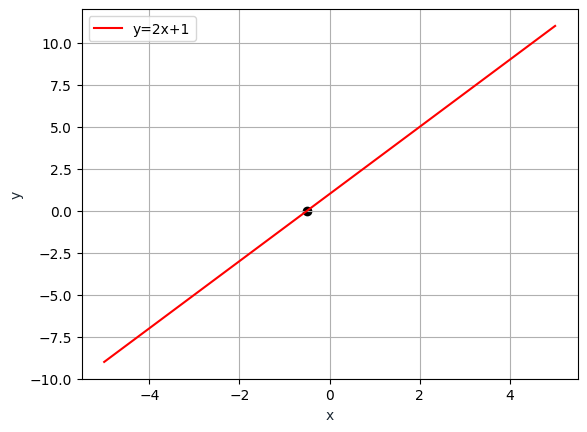

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5,5,100)
y = 2*x+1
plt.plot(x, y, '-r', label='y=2x+1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(-0.5, 0)
plt.grid()
plt.show()

## Quadratic Equation

A quadratic equation is an algebraic equation of the second degree with one or more variables raised to the second order. Here is the general form with two variables in $\mathbb{R}^2$ which is also called the Euclidian Plane: 
 
\begin{equation}
Ax^2+Bxy+Cy^2+Dx+Ey+F=0 \tag{2}
\end{equation}

You might have noticed the mixed term $xy$ in the equation. We can rewrite this equation into its canonical form by eliminating the mixed term without any loss, because this change only reflects a rotation in the coordinate system:

\begin{equation}
Ax^2+By^2+Cx+Dy+E=0 \tag{3}
\end{equation}

In the Euclidian Plane the possible hypersurfaces have dimension 1 and define plane curves like circles, ellipses, hyperbolas, parabolas etc. and are also called conics or conic sections.

The next 2 visualizations have been copied from: https://mmas.github.io/conics-matplotlib which shows exemplary visualizations of quadrics (here conics) in the Euclidian Plane:

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['lines.color'] = 'k'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['k'])

x = np.linspace(-9, 9, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)

def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)

First an example of a parabola in non-standard position according to (2):

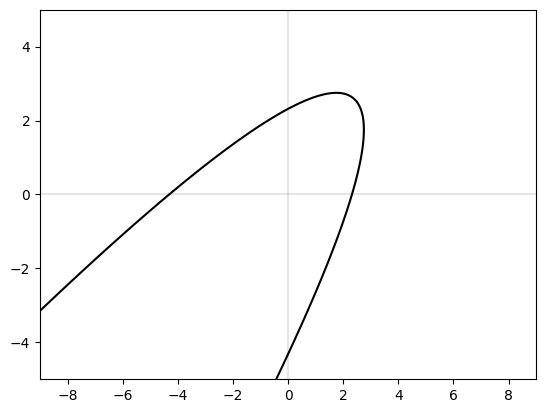

In [4]:
a, b, c, d, e, f = 1, -2, 1, 2, 2, -10
assert b**2 - 4*a*c == 0
axes()
plt.contour(x, y,(a*x**2 + b*x*y + c*y**2 + d*x + e*y + f), [0], colors='k')
plt.show()

Next an ellipsis of a parabola in non-standard position according to (2):

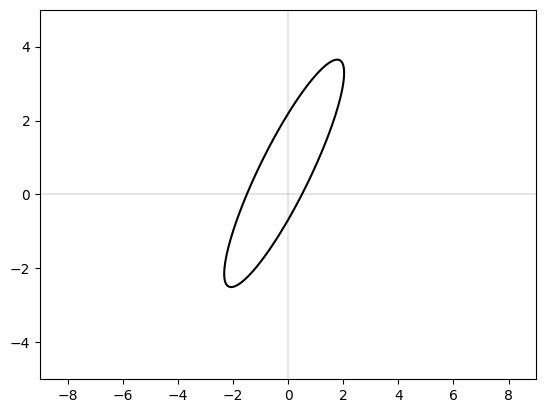

In [5]:
a, b, c, d, e, f = 4, -5, 2, 4, -3, -3
assert b**2 - 4*a*c < 0
axes()
plt.contour(x, y,(a*x**2 + b*x*y + c*y**2 + d*x + e*y + f), [0], colors='k')
plt.show()

If we look at the case of 3 variables in $\mathbb{R}^3$ we get the following equations in general and canonical form respectively

\begin{equation}
Ax^2+By^2+Cz^2+Dxy+Exz+Fyz+Gx+Hy+Iz+J=0 \tag{4}
\end{equation}

\begin{equation}
Ax^2+By^2+Cz^2+Dx+Ey+Fz+G=0 \tag{5}
\end{equation}

This 3-dimensional space is also known as the Euclidian Space and the hypersurfaces of dimension 2 represent spheroids, ellisoids, paraboloids, hyperboloids etc.

Here a simple example of a hyerbolic paraboloid:

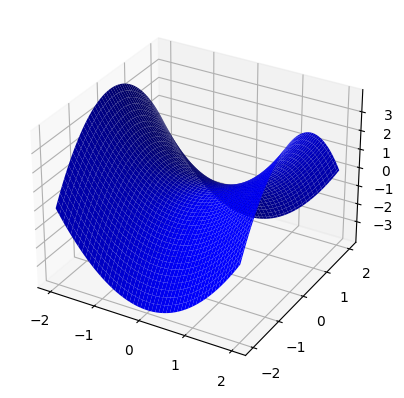

In [6]:
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D

x = linspace(-2, 2, 100)
y = linspace(-2, 2, 100)
X, Y = meshgrid(x, y)
Z = X**2 - Y**2

fig = figure()
ax = axes(projection='3d')
ax.plot_surface(X, Y, Z, color='b')

The interested reader might want to dig deeper and study all possible normal forms. For more visualitions of the 3-dimensional case please check out this great link for the visualizations of quadric hypersurfaces: https://uregina.ca/~franklam/Calc2302/Sage_Quadric.html

## Quadrics

The generalization of the above equations to the case of $n$ variables in $\mathbb{R}^n$ or synonymously the raising of conic sections to the $nth$ dimension is called a quadric. I will only use the quadric canonical form here (no mixed terms, see above):

\begin{equation}
\sum_{i=1}^n q_i x_i^2 + \sum_{i=1}^n w_i x_i + b=0 \tag{6}
\end{equation}

Please note the subtle and convenient renaming of coefficients to names we are so used to in the world of ANNs: The $w_i$ represent the linear weights, $b$ the bias and newly introduced the $qi$ represent the second order weights.

The $n-1$-dimensional hypersurfaces are represented in $n$-dimensional space.

Please note that all kinds of degenerations can occur. If for example all $qi$ are set to $0$, the quadric looses all quadratic terms and 'collapses' into a simple $n-1$ dimensional linear hyperplane.


# Teaser Episode 2 : The Single Quadric Neuron

In the next episode I will introduce the single quadric neuron as a unit with n-dimensional hypersurface separability on the basis of equation (6). 